Projet Numérique "Calcul différentiel"

Tanguy Aurousseau, Hugo de La Marlier

In [2]:
# Importation des librairies
import autograd
import autograd.numpy as np
import pandas as pd
import numpy.linalg


import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Fonctions données par l'énoncé

def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

**Analyse des ensembles de niveau**
==
Question 1
=

Montrons que l'ensemble de niveau c de f,  $f^{-1}(\{c\})$ pour $c \in \mathbb{R}$, est un fermé borné.

Le singleton $\{c\}$ est un fermé. Par continuité de f de $\mathbb{R}^2$ dans $\mathbb{R}$, on en déduit que son image réciproque donc l'ensemble de niveau $f^{-1}(\{c\})$ est un fermé de $\mathbb{R}^2$.

De plus, cet ensemble est borné. En effet :  
Soit $c \in \mathbb{R}$.  
On a $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$ donc :  
$\forall A \in \mathbb{R}, \exists M \in \mathbb{R}, \|(x_1,x_2)\| \ge M \Rightarrow f(x_1,x_2)\gt A$  
En particulier, il existe $l \in \mathbb{R}$ tel que :  
$\forall (x_1,x_2) \in \mathbb{R}^2, \|(x_1,x_2)\| \ge l \Rightarrow f(x_1,x_2)\gt c$  
Alors $f^{-1}(\{c\})$ est majorée (selon la norme euclidienne) par ce réel l : l'ensemble est borné.

D'où $f^{-1}(\{c\})$ fermé et borné.

Question 2
==

Soit $x_0=(x_{10},x_{20}) \in \mathbb{R}^2$  


$p(x_1, x_2) = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}) 
= < (x_1-x_0;x_2-x_0);(\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|};-\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|})> 
= <u,v>$  
Avec $u=(x_1-x_0;x_2-x_0)$ et $v=(\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|};-\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|})$  
On remarque que $v$ est obtenu après rotation du vecteur $grad(f)$ d'un angle $-\frac{\pi}{2}$.

$p(x_1,x_2)$ s'interprète géométriquement comme le produit scalaire de u et v.

Question 3
=

Soit V un voisinage ouvert de $x_0$ tel que $V\subset\mathbb{R}^2$
On pose g de $V \times \mathbb{R}$ dans $\mathbb{R}^2$ avec $g(x,t)=(f(x)-c,p(x)-t)$

Comme f est continûment différentiable, g l'est aussi par définition.

$\partial_x g(x,t) = \begin{pmatrix} \partial_1f(x) & \partial_2f(x)
\\ + \frac {\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & -\frac {\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix}$

Et en $x_0$ :
$\Delta = - \frac{1}{\|\nabla f(x_0)\|} ((\partial_1 f(x_0))^2 + (\partial_2 f(x_0))^2) \neq 0$ car le gradient est non nul en $x_0$  
Comme $\partial_x f$ est continue, le théorème des fonctions implicites s'applique.  

$\forall t \in \mathbb{R}, g(x_0,t)=(0,0)$ donc il existe une fonction
$\gamma$ de $]-\epsilon;\epsilon[$ dans $\mathbb{R}^2$ continûment différentiable telle que :  
$\forall x \in V$ : $f(x_1,x_2)=c$ si et seulement si $(x_1,x_2)=\gamma (t)$ où $t=p(x_1,x_2)$  
d'après le théorème des fonctions implicites.

Question 4
=

Toujours par le théorème des fonctions implicites, on a :  
$\forall t \in ]-\epsilon;\epsilon[, \gamma'(t)=-(\partial_x g(x,t))^{-1}.\partial_t f(x,t)$  

Or,  
$\partial_t f(x,t) = \begin{pmatrix} 0 \\ -1 \end{pmatrix}$

$\partial_x g(x,t))^{-1}=\frac{1}{\Delta} 
\begin{pmatrix} -\frac {\partial_1 f(x_0)}{\|\nabla f(x_0)\|} & -\partial_2f(x)
\\ -\frac {\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & \partial_1 f(x) \end{pmatrix}$  

$\gamma'(t)= -\frac{1}{\Delta} \begin{pmatrix} \partial_2f(x) \\ -\partial_1f(x) \end{pmatrix} \neq 0$  
Car $\nabla f \neq 0$ sur un voisinage ouvert de $x_0$.  

De même $< \gamma'(t),\nabla f(\gamma(t)>=\frac{1}{\Delta} (\partial_2 f(\gamma(t)) \partial_1f(\gamma(t)) - \partial_1 f(\gamma(t)) \partial_2f(\gamma(t))=0$  

D'où $\gamma'(t)$ orthogonal à $\nabla f(\gamma(t)$.

Question 5
=

In [4]:
N = 100
eps = 2.10**(-16)
#eps=eps machine : Car pour un eps plus petit, 
#Python ne détecte pas les variations donc la condition d'arrêt n'arrive jamais

Tâche 1
=

In [5]:
def Newton(F, x0, y0, eps=eps, N=N):
    J_1=numpy.linalg.inv(J(F)(x0,y0))
    for i in range(N):
        x=x0-np.dot(J_1,F(x0,y0))[0]
        y=y0-np.dot(J_1,F(x0,y0))[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

Tâche 2
=

In [6]:
def F1(x,y):
    return np.array([f1(x,y)-0.8,x-y])

Newton(F1,-0.5,-0.5)

(-0.44721393148437083, -0.44721393148437083)

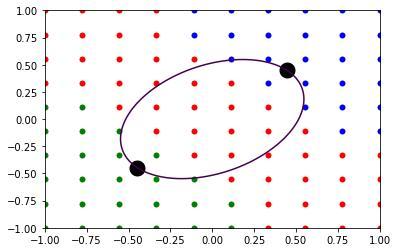

In [7]:
c=0.8

import sys

def F1(x,y):
    return np.array([f1(x,y)-c,x-y])

x=np.linspace(-1.0,1.0,10)
y=np.linspace(-1.0,1.0,10)
x1,y1,x2,y2,x0,y0=[],[],[],[],[],[]
for k in range(10):
    for j in range(10):
        if not sys.warnoptions:
            import warnings
            warnings.simplefilter("ignore")
        try:
            if abs(Newton(F1,x[k],x[j])[0]- Newton(F1,0.8,0.8)[0])<0.1:
                x1.append(x[k])
                y1.append(x[j])
            elif abs(Newton(F1,x[k],x[j])[0]- Newton(F1,-0.5,-0.5)[0])<0.1:
                x2.append(x[k])
                y2.append(x[j])
        except:
            x0.append(x[k])
            y0.append(x[j])

#Tracé ligne de niveau
x=np.linspace(-1, 1, 300) 
y=np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = f1(X, Y)
plt.contour(X, Y, Z, levels = [0.8] )

#Tracé des points initiaux
plt.scatter(x0,y0,color='red',linewidths=0.001)#,'Pas de convergence',color='red')
plt.scatter(x1,y1,color='blue',linewidths=0.001)#,'Convergence Point 1',color='blue')
plt.scatter(x2,y2,color='green',linewidths=0.001)#,'Convergence Point 2',color='green')

#Tracé des points de convergence
plt.scatter(Newton(F1,0.8,0.8)[0],Newton(F1,0.8,0.8)[1], linewidths=10, color = 'black')
plt.scatter(Newton(F1,-0.5,-0.5)[0],Newton(F1,-0.5,-0.5)[1], linewidths=10, color = 'black')
plt.show()

Question 6 + Tâche 3
==

Le point $(x_1,y_1)$ à générer doit respecter deux conditions :
- Appartenir à la ligne de niveau de f : $f(x_1, y_1)=c$
- Appartenir au cercle de centre $(x_0,y_0)$ et de rayon $\delta$

A partir de ces deux conditions, on peut utiliser la fonction Newton, qui pour un $\delta$ suffisamment petit, peut renvoyer deux solutions. Il faut donc vérifier que la solution obtenue est bien "à droite" de $(x_0,y_0)$ en regardant dans la direction de $\nabla f(x_0, y_0)$ : il s'agit de la condition $p(x_1,y_1)>0$.  

La représentation graphique des points de convergence de la fonction de Newton (question précédente), montre que la solution obtenue est celle qui est le plus proche spatialement du point de départ. L'algorithme va donc démarrer à partir d'un point que l'on a approché "à la main" de la bonne solution :  
D'un point $(x_0, y_0)$, on fait démarrer la fonction Newton au point $(x_0+\delta x, y_0+\delta y)$ avec :  

$R=\begin{pmatrix} \partial_y f(x_0,y_0) , - \partial_x f(x_0,y_0) \end{pmatrix}$  : Rotation de $\nabla f(x_0, y_0)$ de $-\frac{\pi}{2}$

$\delta x = \delta.
\frac{1}{\|\nabla f(x_0,y_0)\|}.
R.
\begin{pmatrix} 1 \\ 0 \end{pmatrix}$

$\delta y = \delta.
\frac{1}{\|\nabla f(x_0,y_0)\|}.
R.
\begin{pmatrix} 0 \\ 1 \end{pmatrix}$

array([[2.        , 1.92937515, 1.85925372, ..., 0.75972245, 0.85310216,
        0.94742144],
       [1.        , 0.9292036 , 0.85790854, ..., 1.46743816, 1.50321845,
        1.53644306]])

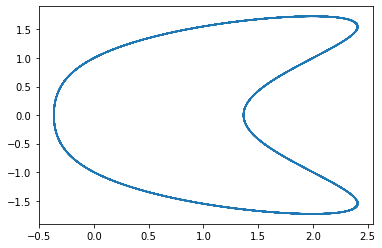

In [8]:
c=2.0

def level_curve(f, x0, y0, delta=0.1, N=1000, eps=eps):
    a, b = x0, y0
    def F(x,y):
        return np.array([f(x,y)-c,(x-a)**2+(y-b)**2-delta**2])
    tableau = np.zeros((2,N),float)
    tableau[0][0],tableau[1][0]=x0,y0
    etapes = 0
    while etapes<N-1:
        etapes+=1
        a,b=x0,y0
        #Initialisation pour une recherche "à droite"
        dx = (1/numpy.linalg.norm(grad(f)(x0,y0)))*grad(f)(x0,y0)[1]*delta
        dy = -(1/numpy.linalg.norm(grad(f)(x0,y0)))*grad(f)(x0,y0)[0]*delta
        x1,y1=x0+dx,y0+dy
        x1,y1=Newton(F,x1,y1,eps,100)
        tableau[0][etapes]=x1
        tableau[1][etapes]=y1
        #Vérification du point
        p=(1/numpy.linalg.norm(grad(f)(x0,y0)))*(grad(f)(x0,y0)[1]*(x1-x0)-grad(f)(x0,y0)[0]*(y1-y0))
        if p<=0:
            return 'error'
        x0,y0=x1,y1
    x=tableau[0]
    y=tableau[1]
    plt.plot(x,y)
    plt.show
    return tableau

level_curve(f2,2.0,1.0)

Question 7 + Tâche 4
==

Optimiste et delta petit : Quasiment aucune chance d'erreur avec méthode comparaison au premier segment.

Ou sinon proposition : 
- Comparaison des deux derniers segments avec les deux premiers segments

In [9]:
c=2.0

def test_inter(tableau,etapes,x,y):
    for i in range(etapes-2):
        #Points à considérer
        x0,y0=tableau[0][i],tableau[1][i]
        x1,y1=tableau[0][i+1],tableau[1][i+1]
        x2,y2=tableau[0][etapes-1],tableau[1][etapes-1]
        #Vérification du domaine d'existence du point d'intersection
        if (max(x0,x1) < min(x2,x)) or (max(y0,y1) < min(y2,y)):
            return False
        #Calcul du point d'intersection
        if x1==x0 or x==x2 :
            return False
        a1=(y1-y0)/(x1-x0)
        a2=(y-y2)/(x-x2)
        if a1==a2:
            return False #Droites parallèles
        b1=y1-a1*x1
        b2=y2-a2*x2
        xf=(b2-b1)/(a1-a2)
        yf=a1*xf+b1
        if xf<max(min(x0,x1), min(x2,x)) or xf>min(max(x0,x1), max(x2,x)):
            return False
        if yf<max(min(y0,y1), min(y2,y)) or yf>min(max(y0,y1), max(y2,y)):
            return False
        return True
        


def level_curve_optimized(f, x0, y0, delta=0.1, N=1000, eps=eps):
    a,b=x0,y0
    def F(x,y):
        return np.array([f(x,y)-c,(x-a)**2+(y-b)**2-delta**2])
    tableau=np.zeros((2,N),float)
    tableau[0][0],tableau[1][0]=x0,y0
    etapes=0
    intersection = False
    while etapes<N-1 and intersection==False :
        a,b=x0,y0
        #Initialisation pour une recherche "à droite"
        x1,y1=(
            x0+(1/numpy.linalg.norm(grad(f)(x0,y0)))*grad(f)(x0,y0)[1]*delta,
            y0-(1/numpy.linalg.norm(grad(f)(x0,y0)))*grad(f)(x0,y0)[0]*delta
        )
        x1,y1=Newton(F,x1,y1,eps,100)
        #Lancer le test si au moins 3 points dans le tableau
        if etapes>2:
            intersection = test_inter(tableau,etapes,x1,y1)
        etapes+=1
        tableau[0][etapes]=x1
        tableau[1][etapes]=y1
        #Vérification du point
        p=(1/numpy.linalg.norm(grad(f)(x0,y0)))*(grad(f)(x0,y0)[1]*(x1-x0)-grad(f)(x0,y0)[0]*(y1-y0))
        if p<=0:
            return 'error'
        x0,y0=x1,y1
    x=tableau[0]
    y=tableau[1]
    plt.plot(x[:etapes],y[:etapes])
    plt.show
    return tableau[:etapes,:etapes],f"Le nombre d'étapes est {etapes}:"

Tâche 5
==

(array([[ 2.        ,  1.92937515,  1.85925372,  1.79013294,  1.72255084,
          1.65713913,  1.59468562,  1.53621433,  1.48308662,  1.43710927,
          1.40058583,  1.37615163,  1.3661797 ,  1.37182804,  1.39242546,
          1.42583951,  1.46942674,  1.52075934,  1.57789147,  1.63934757,
          1.70402031,  1.77106485,  1.83981276,  1.9097054 ,  1.98023928,
          2.05091402,  2.12116999,  2.19029187,  2.25722276,  2.32012679,
          2.37510595,  2.41127493,  2.39443028,  2.31575943,  2.22027092,
          2.12125028,  2.02136306,  1.92137468,  1.82157011,  1.72207805,
          1.62296881,  1.52429015,  1.42608242,  1.32838599,  1.23124548,
          1.13471278,  1.03884966,  0.94373054,  0.84944568,  0.75610511,
          0.66384352,  0.57282665,  0.4832593 ,  0.39539559,  0.30955168,
          0.22612119,  0.14559234,  0.06856467, -0.00424053, -0.07198655,
         -0.13376057, -0.18866284, -0.23594908, -0.2751962 , -0.30642438,
         -0.33010622, -0.34704485, -0.

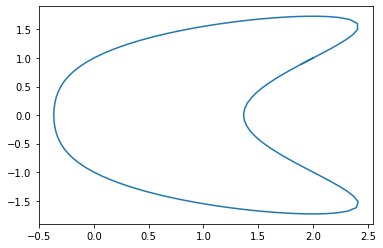

In [10]:
level_curve_optimized(f2,2.0,1.0)

Question 8
==

Posons :  
$P_1 = (x_{P1},y_{P1})$, $P_2 = (x_{P2},y_{P2})$, $u_1 = (v_1,w_1)$ et $u_2 = (v_2,w_2)$  

$\gamma'(0)$ et $u_1$ sont dans la même direction et le même sens donc :  
$\gamma'(0) = \rho.u_1$ avec $\rho \in \mathbb{R}^{+}$  
De même pour $\gamma'(1)$ et $u_2$:  
$\gamma'(1) = \mu.u_2$ avec $\mu \in \mathbb{R}^{+}$ 

On a :  
$\gamma(0) = P_1 = (x_{P1},y_{P1}) = (a,d)$  
$\gamma(1) = P_2 = (x_{P2},y_{P2}) = (a+b+c,d+e+f)$  
$\gamma'(0) = (b, e)$  
$\gamma'(1) = (b+2c, e+2f)$  

Après résolution du système, on obtient :  
$\mu = 2.\frac{(x_{P2}-x_{P1})w_1-(y_{P2}-y_{P1})v_1}{w_1v_2-w_2v_1}$  
$\rho = 2.\frac{(x_{P2}-x_{P1})w_2-(y_{P2}-y_{P1})v_2}{v_1w_2-v_2w_1}$  

Les conditions à respecter sont :
$\rho > 0$ et $\mu > 0$ pour avoir $\gamma'(0)$ et $u_1$ ainsi que $\gamma'(1)$ et $u_2$ dans le même sens.

Tâche 6
==

In [11]:
def gamma(t,P1,P2,u1,u2):
    xp1, yp1 = P1
    xp2, yp2 = P2
    v1, w1 = u1
    v2, w2 = u2
    rho = (2*(w2*(xp2-xp1)-v2*(yp2-yp1)))/((v1*w2)-(v2*w1))
    mu = (2*(w1*(xp2-xp1)-v1*(yp2-yp1)))/(v2*w1-v1*w2)
    a=xp1
    b=rho*v1
    c=0.5*(mu*v2-rho*v1)
    d=yp1
    e=rho*w1
    f=0.5*(mu*w2-rho*w1)
    #Conditions
    I=np.ones(len(t))
    if mu>0 and rho>0:
        return np.array([a*I + b*t + c*t*t, d*I + e*t + f*t*t])
    else:
        return np.array([(xp2-xp1)*np.linspace(0,1,len(t))+xp1,(yp2-yp1)*np.linspace(0,1,len(t))+yp1])

Tâche 7
==

Les vecteurs $u_1$ et $u_2$ sont les vecteurs gradients après rotation de $-\frac{\pi}{2}$ aux points $P_1$ et $P_2$,
car la droite tangente à une courbe en point est orthogonal au gradient en ce point.  
La norme de $u_1$ et de $u_2$ n'importe pas.

In [12]:
#En commentaire, les modifications par rapport à level_curve_optimized

def new_level_curve(f, x0, y0, oversampling, delta = 0.1, N=1000, eps=eps):
    a,b=x0,y0
    def F(x,y):
        return np.array([f(x,y)-c,(x-a)**2+(y-b)**2-delta**2])
    #Tableau élargi
    tableau=np.zeros((2,N*oversampling),float)
    tableau[0][0],tableau[1][0]=x0,y0
    etapes=0
    intersection = False
    while etapes<N-1 and intersection==False :
        a,b=x0,y0
        x1,y1=x0+(1/numpy.linalg.norm(grad(f)(x0,y0)))*grad(f)(x0,y0)[1]*delta,y0-(1/numpy.linalg.norm(grad(f)(x0,y0)))*grad(f)(x0,y0)[0]*delta
        x1,y1=Newton(F,x1,y1,eps,100)
        if etapes>2:
            intersection = test_inter(tableau,etapes*oversampling,x1,y1)
        #Interpolation avec le nouveau point obtenu
        if oversampling>1:
            u1=(grad(f)(x0,y0)[1],-grad(f)(x0,y0)[0])
            u2=(grad(f)(x1,y1)[1],-grad(f)(x1,y1)[0])
            tableau[:,etapes*oversampling:(etapes+1)*oversampling+1] = (
                gamma(np.linspace(0,1,oversampling+1),(x0,y0),(x1,y1),u1,u2)
            )
        etapes+=1
        p=((1/numpy.linalg.norm(grad(f)(x0,y0)))**(-1))*(grad(f)(x0,y0)[1]*(x1-x0)-grad(f)(x0,y0)[0]*(y1-y0))
        if p<=0:
            return 'error'
        x0,y0=x1,y1
    x=tableau[0]
    y=tableau[1]
    plt.plot(x[:(etapes)*oversampling],y[:(etapes)*oversampling])
    plt.show()
    return (
        tableau[:,:(etapes)*oversampling],
        f"Le nombre d'étapes est : {etapes+1}",
        f"Le nombre de points est : {(etapes+1)*oversampling}"
    )

Tâche 8
==

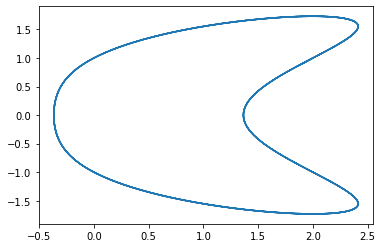

(array([[2.        , 1.98215301, 1.96616703, ..., 1.9378444 , 1.92375146,
         1.91064577],
        [1.        , 0.98214615, 0.96613958, ..., 0.93772298, 0.92353182,
         0.91029803]]),
 "Le nombre d'étapes est : 343",
 'Le nombre de points est : 1715')

In [13]:
new_level_curve(f2, 2.0, 1.0, 5)

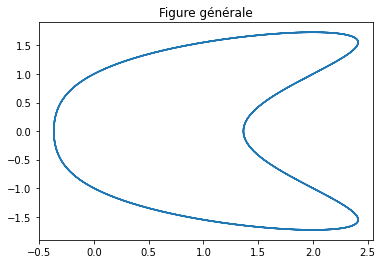

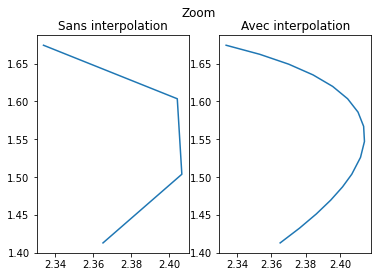

In [14]:
def zoom(start,points,oversampling):
    plt.title('Figure générale')
    Tableau = new_level_curve(f2, 2.0, 1.0, oversampling)[0]
    x1,y1 = Tableau[:,start*oversampling:start*oversampling+points*oversampling:oversampling]
    x2,y2 = Tableau[:,start*oversampling:start*oversampling+(points-1)*oversampling+1]
    figure, axes = plt.subplots(1,2)
    
    figure.suptitle('Zoom')
    axes[0].set_title('Sans interpolation')
    axes[0].plot(x1,y1)
    axes[1].set_title('Avec interpolation')
    axes[1].plot(x2,y2)
    
    plt.show()
    
zoom(105,4,5)